In [3]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read and prepare data

In [4]:
Xtrain_new = pd.read_csv('Xtrain_new.csv',index_col=0)
Xtrain_new.head()

,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0.020,88.0,1.04000,288.0,2997.0,8.0
1,6.120,198.0,1.13743,401.0,13944.0,12.0
2,0.487,12364.0,1.75000,1792.0,590.0,23.0
3,0.060,101833.0,1.00000,32.0,63.0,21.0
4,0.560,114.0,1.00000,372.0,7207.0,7.0


In [5]:
Xtest_new = pd.read_csv('Xtest_new.csv',index_col=0)
Xtest_new.head()

,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0.087000,72926.0,1.330000,15,126.0,17
1,0.267000,1681.0,1.000000,61,2050.0,20
2,6.960000,179.0,1.000000,29,666.0,9
3,2.259314,2196.0,1.200000,309,3049.0,17
4,0.107000,2862.0,1.137582,47,1307.0,21


In [6]:
Ytrain = pd.read_csv('Ytrain.csv',index_col=0,header=0, dtype=float)
Ytrain.head()

,label
0.0,0.0
1.0,0.0
2.0,0.0
3.0,0.0
4.0,0.0


In [7]:
Ytest = pd.read_csv('Ytest.csv',index_col=0,header=0)
Ytest.head()

,label
0,0
1,0
2,1
3,0
4,0


In [8]:
ytest = Ytest.values.reshape(1,-1)[0]

ytrain = Ytrain.values.reshape(1,-1)[0]

# model building

In [11]:
from sklearn.model_selection import cross_val_score
from time import time
import datetime
from sklearn.model_selection import GridSearchCV

In [12]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler().fit(Xtrain_new)

X1_train = Scaler.transform(Xtrain_new)
X1_test = Scaler.transform(Xtest_new)

In [16]:
start_time = time()

param_grid = {
                'n_estimators': [75, 100, 150],
                'learning_rate': [0.1, 0.3, 0.4],
                'max_depth': [5, 10, 15]
              }

clf = GridSearchCV(xgb.XGBClassifier(seed=42), param_grid, cv=5, scoring='accuracy')

clf.fit(X1_train, ytrain)

end_time = time()

elapsed_time = end_time - start_time
print("running time：", elapsed_time)

print('best parameter', clf.best_params_)
print('best score', clf.best_score_)

running time： 2421.5758259296417
best parameter {'learning_rate': 0.4, 'max_depth': 15, 'n_estimators': 150}
best score 0.9354295707967403


# model fitting and evaluation

In [19]:
model = xgb.XGBClassifier(seed = 114514, n_estimators = 150, learning_rate = 0.4, max_depth = 10)

model.fit(X1_train, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [21]:
ypredict = model.predict(X1_test)

y_proba = model.predict_proba(X1_test)[:, 1]

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

In [26]:
auc_score = roc_auc_score(ytest, y_proba)

fpr, tpr, thresholds = roc_curve(ytest, y_proba)

def drawRoc(auc_score,fpr,tpr):
    plt.subplots(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

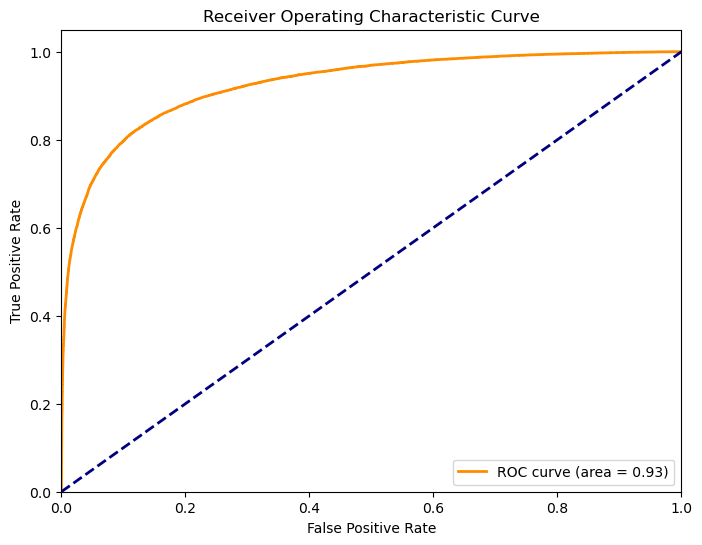

In [28]:
drawRoc(auc_score, fpr, tpr)